## data set 
* columns : 23 (0 ~ 22)
    * feature : 22, label : 1
* rows : 4000

1. 데이터 로드
2. feature selection
3. 전처리
4. pytorch import 및 데이터 자료형 변환 (numpy -> torch)
5. 신경망 모듈 정의
6. 학습
7. 학습 코드 함수 버전

In [1]:
# fix seed

split_seed = 1234

<br>

### 1. 데이터 로드

In [2]:
# load data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv', names = range(23))
df_X = df.loc[:, df.columns != 22]
df_y = df[22]

print(df_X.head())

   0     1   2   3   4   5   6   7   8   9   ...  12  13  14  15  16  17  18  \
0   3   529   5   4   4   3   1   0   5   1  ...   2   3   5   1  32   0   2   
1   3  1846   3   3   3   4   2  10   3   1  ...   2   3   2   2  22  12   2   
2   3  3240   5   4   5   4   1   0   4   1  ...   1   4   1   2  61   0   2   
3   4   163   2   1   5   3   4   0   3   1  ...   2   5   5   5  52   7   1   
4   3  2813   3   3   5   2   5   0   3   1  ...   2   3   5   4  24   0   1   

   19  20  21  
0   3   3   2  
1   1   3   3  
2   5   4   1  
3   4   4   2  
4   5   3   1  

[5 rows x 22 columns]


은닉층에 normalization 이 있긴 하지만 입력값에도 normalizing 해주면 학습이 좀더 안정적으로 된다.

In [3]:
# X data normalizing

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df.loc[:, df.columns != 22]

df_X = pd.DataFrame(scaler.fit_transform(X))
df_y = df[22]

print(df_X.head())

     0         1    2     3     4    5    6         7     8    9   ...   12  \
0  0.50  0.096002  1.0  0.75  0.75  0.6  0.2  0.000000  1.00  0.0  ...  1.0   
1  0.50  0.363304  0.6  0.50  0.50  0.8  0.4  0.012594  0.50  0.0  ...  1.0   
2  0.50  0.646235  1.0  0.75  1.00  0.8  0.2  0.000000  0.75  0.0  ...  0.0   
3  0.75  0.021717  0.4  0.00  1.00  0.6  0.8  0.000000  0.50  0.0  ...  1.0   
4  0.50  0.559570  0.6  0.50  1.00  0.4  1.0  0.000000  0.50  0.0  ...  1.0   

     13   14   15        16        17   18   19    20   21  
0  0.50  1.0  0.2  0.320513  0.000000  1.0  0.6  0.50  0.5  
1  0.50  0.4  0.4  0.192308  0.015094  1.0  0.2  0.50  1.0  
2  0.75  0.2  0.4  0.692308  0.000000  1.0  1.0  0.75  0.0  
3  1.00  1.0  1.0  0.576923  0.008805  0.0  0.8  0.75  0.5  
4  0.50  1.0  0.8  0.217949  0.000000  0.0  1.0  0.50  0.0  

[5 rows x 22 columns]


<br>

### 2. feature selection
어차피 학습 과정에서 필요없는 feature 가 영향을 끼치지 않도록 파라미터들이 조정될 것 같기도 했고,  
실제로 테스트했을 때도 Cost 에 큰 차이가 없었지만, filter method 사용 예시로 일단 넣어두었다.

In [4]:
# feature selection : filter method

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func = chi2, k = df_X.shape[1])
fit = test.fit(df_X, df_y)

print(np.sort(fit.scores_)[::-1])

f_order = np.argsort(-fit.scores_)
sorted_columns = df.columns[f_order]

print(sorted_columns.tolist())

[5.49509555e+02 2.36520563e+02 1.11431480e+02 9.96283292e+01
 5.38567399e+01 4.26981710e+01 4.14276727e+01 3.30914619e+01
 2.89669352e+01 2.65725687e+01 3.28686087e+00 2.44688676e+00
 1.27908353e+00 6.50249199e-01 5.13356106e-01 2.63595940e-01
 2.10240909e-01 2.05763926e-01 1.52444234e-01 2.05977409e-02
 1.42434471e-02 5.12844240e-03]
[9, 21, 5, 20, 1, 2, 11, 3, 13, 19, 17, 7, 15, 10, 0, 4, 6, 12, 16, 8, 14, 18]


<br>

### 3. 전처리

In [5]:
# preprocessing

from sklearn.preprocessing import LabelEncoder

# label 값 인코딩
encoder = LabelEncoder()
encoder.fit(df_y)
df_y_encoded_nn = pd.DataFrame(encoder.transform(df_y))

# feature selection 결과 적용
fs_nn = sorted_columns[0:13]
df_X_selected_nn = df_X[fs_nn]

np_y = np.array(df_y_encoded_nn).reshape(4000, )
np_X = np.array(df_X_selected_nn)

print(np_X[:5])

[[0.         0.5        0.6        0.5        0.09600162 1.
  0.25       0.75       0.5        0.6        0.         0.
  0.2       ]
 [0.         1.         0.8        0.5        0.36330424 0.6
  0.5        0.5        0.5        0.2        0.01509434 0.01259446
  0.4       ]
 [0.         0.         0.8        0.75       0.64623503 1.
  1.         0.75       0.75       1.         0.         0.
  0.4       ]
 [0.         0.5        0.6        0.75       0.02171707 0.4
  0.25       0.         1.         0.8        0.00880503 0.
  1.        ]
 [0.         0.         0.4        0.5        0.55956972 0.6
  0.75       0.5        0.5        1.         0.         0.
  0.8       ]]


<br>

### 4. pytorch import 및 데이터 자료형 변환 (numpy -> torch)

In [6]:
# load pytorch

import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

from tqdm import tqdm
import matplotlib.pyplot as plt

train_X_nn, test_X_nn, train_y_nn, test_y_nn = train_test_split(np_X, np_y, test_size = 0.3, random_state = split_seed)

train_X_nn = torch.tensor(train_X_nn, dtype = torch.float32)
train_y_nn = torch.tensor(train_y_nn, dtype = torch.float32)
test_X_nn = torch.tensor(test_X_nn, dtype = torch.float32)
test_y_nn = torch.tensor(test_y_nn, dtype = torch.float32)

'''
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data[:100]
y = iris.target[:100]

X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

'''

print("train data : ", train_X_nn.shape[0])
print("test data : ", test_X_nn.shape[0])

train data :  2800
test data :  1200


<br>

### 5. 신경망 모듈 정의
신경망은 원래 nn.Sequential 만 사용해서 짜거나, 단층 신경망인 경우 레이어 하나만 사용해도 학습은 할 수 있지만
모듈화를 해서 사용하는 것이 편하다.

In [7]:
# Neural Network (module)

class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()

        self.custom_linear = nn.Sequential(
            nn.Linear(13, 16),
            nn.ReLU(),
            nn.BatchNorm1d(16),
            nn.Dropout(0.25),

            nn.Linear(16, 16),
            nn.ReLU(),
            nn.BatchNorm1d(16),
            nn.Dropout(0.25),

            nn.Linear(16, 8),
            nn.ReLU(),
            nn.BatchNorm1d(8),
            nn.Dropout(0.125),

            nn.Linear(8, 4),
            nn.ReLU(),
            nn.BatchNorm1d(4),

            nn.Linear(4, 1)
        )
        
    def forward(self, x):
        x = self.custom_linear(x)
        return x

<br>

### 6. 학습

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:42<00:00, 61.72it/s]



 0.0001 0.1 10000 

losses   :  0.3260039687156677
accuracy :  0.9007142782211304
test losses   :  0.35765278339385986
test accuracy :  0.8666666746139526


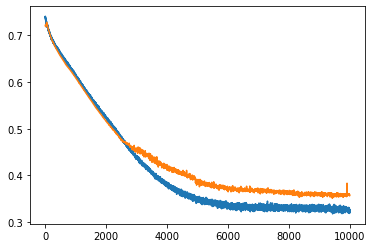

In [9]:
net = CustomNet()

device = "cuda" if torch.cuda.is_available() else "cpu"
net = net.to(device)

train_X_nn = train_X_nn.to(device)
train_y_nn = train_y_nn.to(device)
test_X_nn = test_X_nn.to(device)
test_y_nn = test_y_nn.to(device)

loss_fn = nn.BCEWithLogitsLoss().cuda()
lr = 1e-4
weight_decay = 0.1
optimizer = optim.Adam(net.parameters(), lr = lr, weight_decay = weight_decay)
epoc_num = 10000

# learning record
losses = []
acc_list = []
test_losses = []
test_acc_list = []

for epoc in tqdm(range(epoc_num)):
    # train data set
    net.train()
    
    y_pred = net(train_X_nn)
    loss = loss_fn(y_pred.view_as(train_y_nn), train_y_nn)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    pred_round =  torch.round(torch.sigmoid(y_pred.view_as(train_y_nn)))
    acc_list.append(torch.mean((train_y_nn == pred_round).float()).item())
    
    # test_data set
    net.eval()
    
    with torch.no_grad():
        test_y_pred = net(test_X_nn)
        test_loss = loss_fn(test_y_pred.view_as(test_y_nn), test_y_nn)
    
    test_losses.append(test_loss.item())
    test_pred_round =  torch.round(torch.sigmoid(test_y_pred.view_as(test_y_nn)))
    test_acc_list.append(torch.mean((test_y_nn == test_pred_round).float()).item())

print("\n", lr, weight_decay, epoc_num, "\n")
    
print("losses   : ", losses[-1])
print("accuracy : ", acc_list[-1])

print("test losses   : ", test_losses[-1])
print("test accuracy : ", test_acc_list[-1])

plt.plot(list(range(epoc_num)), losses, list(range(epoc_num)), test_losses)
plt.show()

학습시마다 파라미터 초기화를 하지 않으면, 다시 학습코드를 돌릴 때 이전의 상태에서부터 시작하게 된다. 매번 신경망 모델을 새로 생성하게끔 하면 (net = CustomNet()) 문제가 없지만
파라미터를 직접 초기화 하는 방법도 일단 적어두었다.
관련 참고자료
https://jh-bk.tistory.com/10
https://stackoverflow.com/questions/49433936/how-to-initialize-weights-in-pytorch
https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py

In [10]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

net.apply(init_weights)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


CustomNet(
  (custom_linear): Sequential(
    (0): Linear(in_features=13, out_features=16, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.25)
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.25)
    (8): Linear(in_features=16, out_features=8, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.125)
    (12): Linear(in_features=8, out_features=4, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Linear(in_features=4, out_features=1, bias=True)
  )
)

<br>

### 7. 학습 코드 함수 버전
튜닝을 편하게 하고 기록이 노트북 상에 남게 하려면, 학습코드를 함수형태로 만들어 놓는 게 좋다.

In [8]:
from tqdm import tqdm

def train_net(net, train_loader, test_loader, 
              optimizer,
              loss_fn=nn.CrossEntropyLoss(),
              n_iter = 10, device="cpu"):
    
    if not torch.cuda.is_available():
        deivce = "cpu"
        
    print("deivce : ", device)
    net.to(device)
    
    # train
    itr = []
    train_losses = []
    train_acc = []
    test_losses = []
    test_acc = []
    
    for epoch in tqdm(range(n_iter)):
        # train data set
        net.train()
        trn = 0
        trn_loss = 0.0
        trn_acc = 0.0
        
        for i , (xx, yy) in enumerate(train_loader):
            trn += len(xx)
            xx = xx.to(device)
            yy = yy.to(device)

            h = net(xx)
            loss = loss_fn(h.view_as(yy), yy)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_item = loss.item()
            itr.append(loss_item)
            trn_loss += loss_item
            
            y_pred =  torch.round(torch.sigmoid(h.view_as(yy)))
            trn_acc += (yy == y_pred).float().sum().item()
            # 여기서는 accuaracy 코드가 특정 loss 함수에만 맞도록 작성했는데, 이 부분을 입력값에 따라 다르게 처리되도록 만들어보면 좋을듯.
        
        train_losses.append(trn_loss/(i+1))
        train_acc.append(trn_acc/trn)
        

        # test_data set
        net.eval()
        ten = 0
        ten_loss = 0.0
        ten_acc = 0.0
                           
        for i , (xx, yy) in enumerate(test_loader):
            ten += len(xx)
            xx = xx.to(device)
            yy = yy.to(device)
            
            with torch.no_grad():            
                h = net(xx)
                loss = loss_fn(h.view_as(yy), yy)

            ten_loss += loss.item()
                           
            y_pred =  torch.round(torch.sigmoid(h.view_as(yy)))
            ten_acc += (yy == y_pred).float().sum().item()

        test_losses.append(ten_loss/(i+1))
        test_acc.append(ten_acc/ten)

    return itr, train_losses, train_acc, test_losses, test_acc

In [9]:
train_set = TensorDataset(train_X_nn, train_y_nn)
test_set = TensorDataset(test_X_nn, test_y_nn)

여기서 사용한 데이터 셋은 feature 와 데이터 갯수가 많은 편이 아니다보니 (13, 2800)  
한꺼번에 돌리는데 문제가 없어서 batch_size 를 아예 데이터 셋 크기에 맞게 입력했지만  
원래는 일반적으로 2의 지수승 (128, 256 ...) 을 사용함 

deivce :  cuda


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:11<00:00, 18.13it/s]


iteration - cost graph


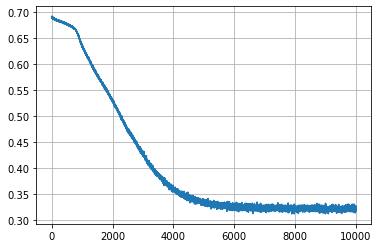

In [11]:
net = CustomNet()

batch_size = 2800
train_loader = DataLoader(train_set, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_set, batch_size = batch_size, shuffle = True)

lr = 1e-4
weight_decay = 0.1
optimizer = optim.Adam(net.parameters(), lr = lr, weight_decay = weight_decay)
loss_fn = nn.BCEWithLogitsLoss()

itr, train_losses, train_acc, test_losses, test_acc = train_net(net, train_loader, test_loader, optimizer, loss_fn, n_iter =10000, device = 'cuda')

print("iteration - cost graph")
plt.plot(itr)
plt.grid()
plt.show()

losses   :  0.321379691362381
accuracy :  0.8921428571428571
test losses   :  0.35336828231811523
test accuracy :  0.8758333333333334


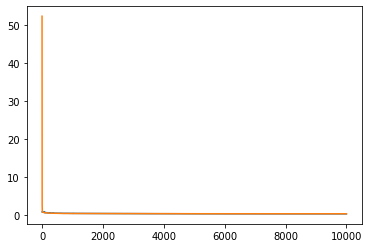

In [14]:
print("losses   : ", train_losses[-1])
print("accuracy : ", train_acc[-1])

print("test losses   : ", test_losses[-1])
print("test accuracy : ", test_acc[-1])

plt.plot(list(range(len(train_losses))), train_losses, list(range(len(test_losses))), test_losses)
plt.show()